In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import datetime as dt
%matplotlib inline 
import plotly.express as px



In [2]:
import nltk

In [3]:
df = pd.read_excel('Test.xlsx')

In [4]:
df.head()

,Survey ID,Satisfaction score,Reason for Satisfaction score,Favorite Feature,CSAT Rating
0,95451,7,Anthony was great and he made buying my first ...,Hybrid power,Extremely Satisfied
1,95092,5,Experience owning and riding McLaren's first c...,Driver's experience,Fairly Satisfied
2,92348,7,"Very attentive staff, great service","The exterior design, you know it’s a McLaren w...",Extremely Satisfied
3,93608,5,A car that gives you satisfaction every time y...,"Hybrid, track settings and suspension settings...",Fairly Satisfied
4,92501,7,Amazing automobile.,power,Extremely Satisfied


In [5]:
#Reading the first satisfaction score


df['Reason for Satisfaction score'].values[0]

'Anthony was great and he made buying my first super car a breeze'

In [6]:
df.head()

,Survey ID,Satisfaction score,Reason for Satisfaction score,Favorite Feature,CSAT Rating
0,95451,7,Anthony was great and he made buying my first ...,Hybrid power,Extremely Satisfied
1,95092,5,Experience owning and riding McLaren's first c...,Driver's experience,Fairly Satisfied
2,92348,7,"Very attentive staff, great service","The exterior design, you know it’s a McLaren w...",Extremely Satisfied
3,93608,5,A car that gives you satisfaction every time y...,"Hybrid, track settings and suspension settings...",Fairly Satisfied
4,92501,7,Amazing automobile.,power,Extremely Satisfied


In [7]:
df.shape

(55, 5)

# Quick EDA

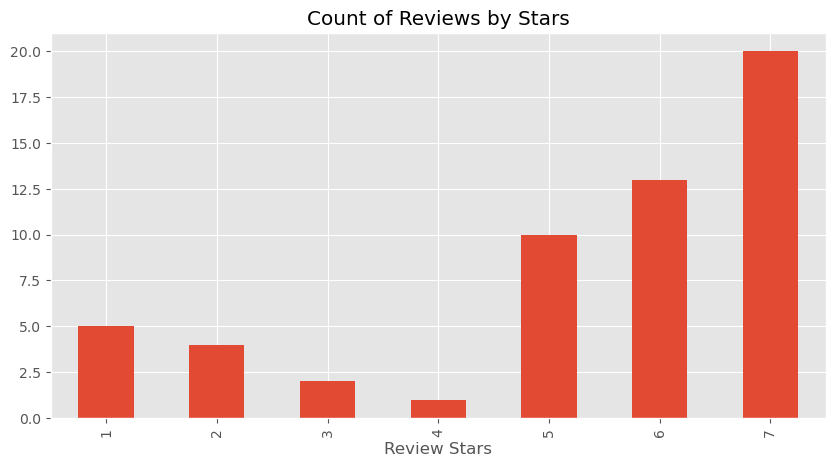

In [8]:
ax = df['Satisfaction score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# BASIC NLTK

In [9]:
example = df['Reason for Satisfaction score'][50]
print(example)

As expected  high performance agility and great looks


In [10]:
#This breaks the words and assigns tokens to them

tokens = nltk.word_tokenize(example)
tokens[:10]

['As', 'expected', 'high', 'performance', 'agility', 'and', 'great', 'looks']

In [11]:
#This assigns the part of speach, POS to each work according to text categorizer in NLTK


tagged = nltk.pos_tag(tokens)
tagged[:10]

[('As', 'IN'),
 ('expected', 'VBN'),
 ('high', 'JJ'),
 ('performance', 'NN'),
 ('agility', 'NN'),
 ('and', 'CC'),
 ('great', 'JJ'),
 ('looks', 'NNS')]

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  As/IN
  expected/VBN
  high/JJ
  performance/NN
  agility/NN
  and/CC
  great/JJ
  looks/NNS)


## Step 1. VADER Seniment Scoring


We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

VADER does not account for relationships between words which is usually needed n sentiment analysis

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\afolabi.ajao\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores("Never call me in your life again I will never take your call if you do ")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
sia.polarity_scores("What sort of life are you living")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
sia.polarity_scores("This is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [18]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

In [19]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reason for Satisfaction score']
    myid = row['Survey ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/55 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Survey ID'})
vaders = vaders.merge(df, how='left')

In [21]:
vaders.head()

,Survey ID,neg,neu,pos,compound,Satisfaction score,Reason for Satisfaction score,Favorite Feature,CSAT Rating
0,95451,0.0,0.556,0.444,0.8402,7,Anthony was great and he made buying my first ...,Hybrid power,Extremely Satisfied
1,95092,0.0,0.696,0.304,0.8766,5,Experience owning and riding McLaren's first c...,Driver's experience,Fairly Satisfied
2,92348,0.0,0.478,0.522,0.6557,7,"Very attentive staff, great service","The exterior design, you know it’s a McLaren w...",Extremely Satisfied
3,93608,0.0,0.756,0.244,0.4404,5,A car that gives you satisfaction every time y...,"Hybrid, track settings and suspension settings...",Fairly Satisfied
4,92501,0.0,0.208,0.792,0.5859,7,Amazing automobile.,power,Extremely Satisfied


# Plot VADER results

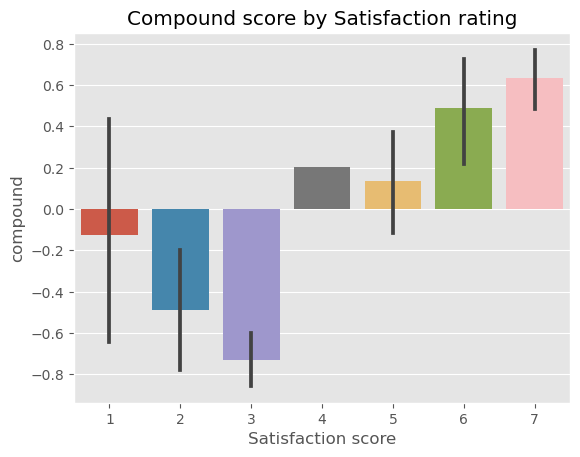

In [22]:
ax = sns.barplot(data=vaders, x='Satisfaction score', y='compound')
ax.set_title('Compound score by Satisfaction rating')
plt.show()

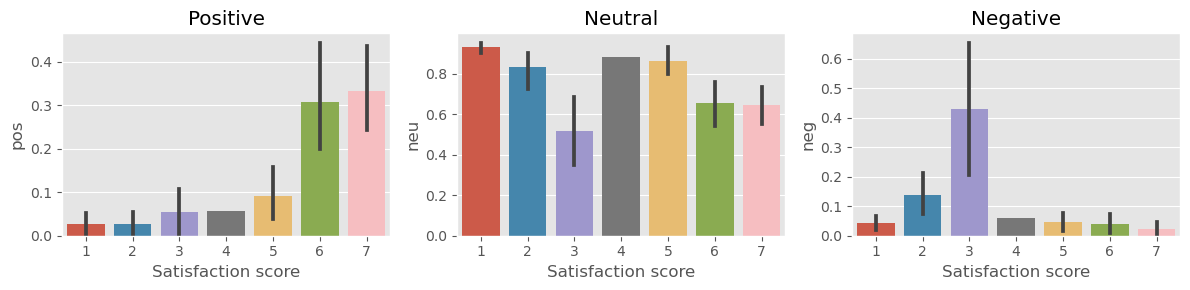

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Satisfaction score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Satisfaction score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Satisfaction score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model


Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [26]:
# VADER results on example
print(example)
sia.polarity_scores(example)

As expected  high performance agility and great looks


{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

In [27]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0046328944, 'roberta_neu': 0.07792051, 'roberta_pos': 0.9174466}


In [28]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [29]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Reason for Satisfaction score']
        myid = row['Survey ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/55 [00:00<?, ?it/s]

In [30]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Survey ID'})
results_df = results_df.merge(df, how='left')

# Compare Scores between models

In [31]:
results_df.head()

,Survey ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Satisfaction score,Reason for Satisfaction score,Favorite Feature,CSAT Rating
0,95451,0.0,0.556,0.444,0.8402,0.001742,0.010501,0.987757,7,Anthony was great and he made buying my first ...,Hybrid power,Extremely Satisfied
1,95092,0.0,0.696,0.304,0.8766,0.004421,0.063009,0.932570,5,Experience owning and riding McLaren's first c...,Driver's experience,Fairly Satisfied
2,92348,0.0,0.478,0.522,0.6557,0.003340,0.033732,0.962929,7,"Very attentive staff, great service","The exterior design, you know it’s a McLaren w...",Extremely Satisfied
3,93608,0.0,0.756,0.244,0.4404,0.004656,0.058997,0.936348,5,A car that gives you satisfaction every time y...,"Hybrid, track settings and suspension settings...",Fairly Satisfied
4,92501,0.0,0.208,0.792,0.5859,0.013099,0.107507,0.879394,7,Amazing automobile.,power,Extremely Satisfied


In [32]:
results_df.columns

Index(['Survey ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Satisfaction score',
       'Reason for Satisfaction score', 'Favorite Feature', 'CSAT Rating'],
      dtype='object')

# Step 3. Combine and compare

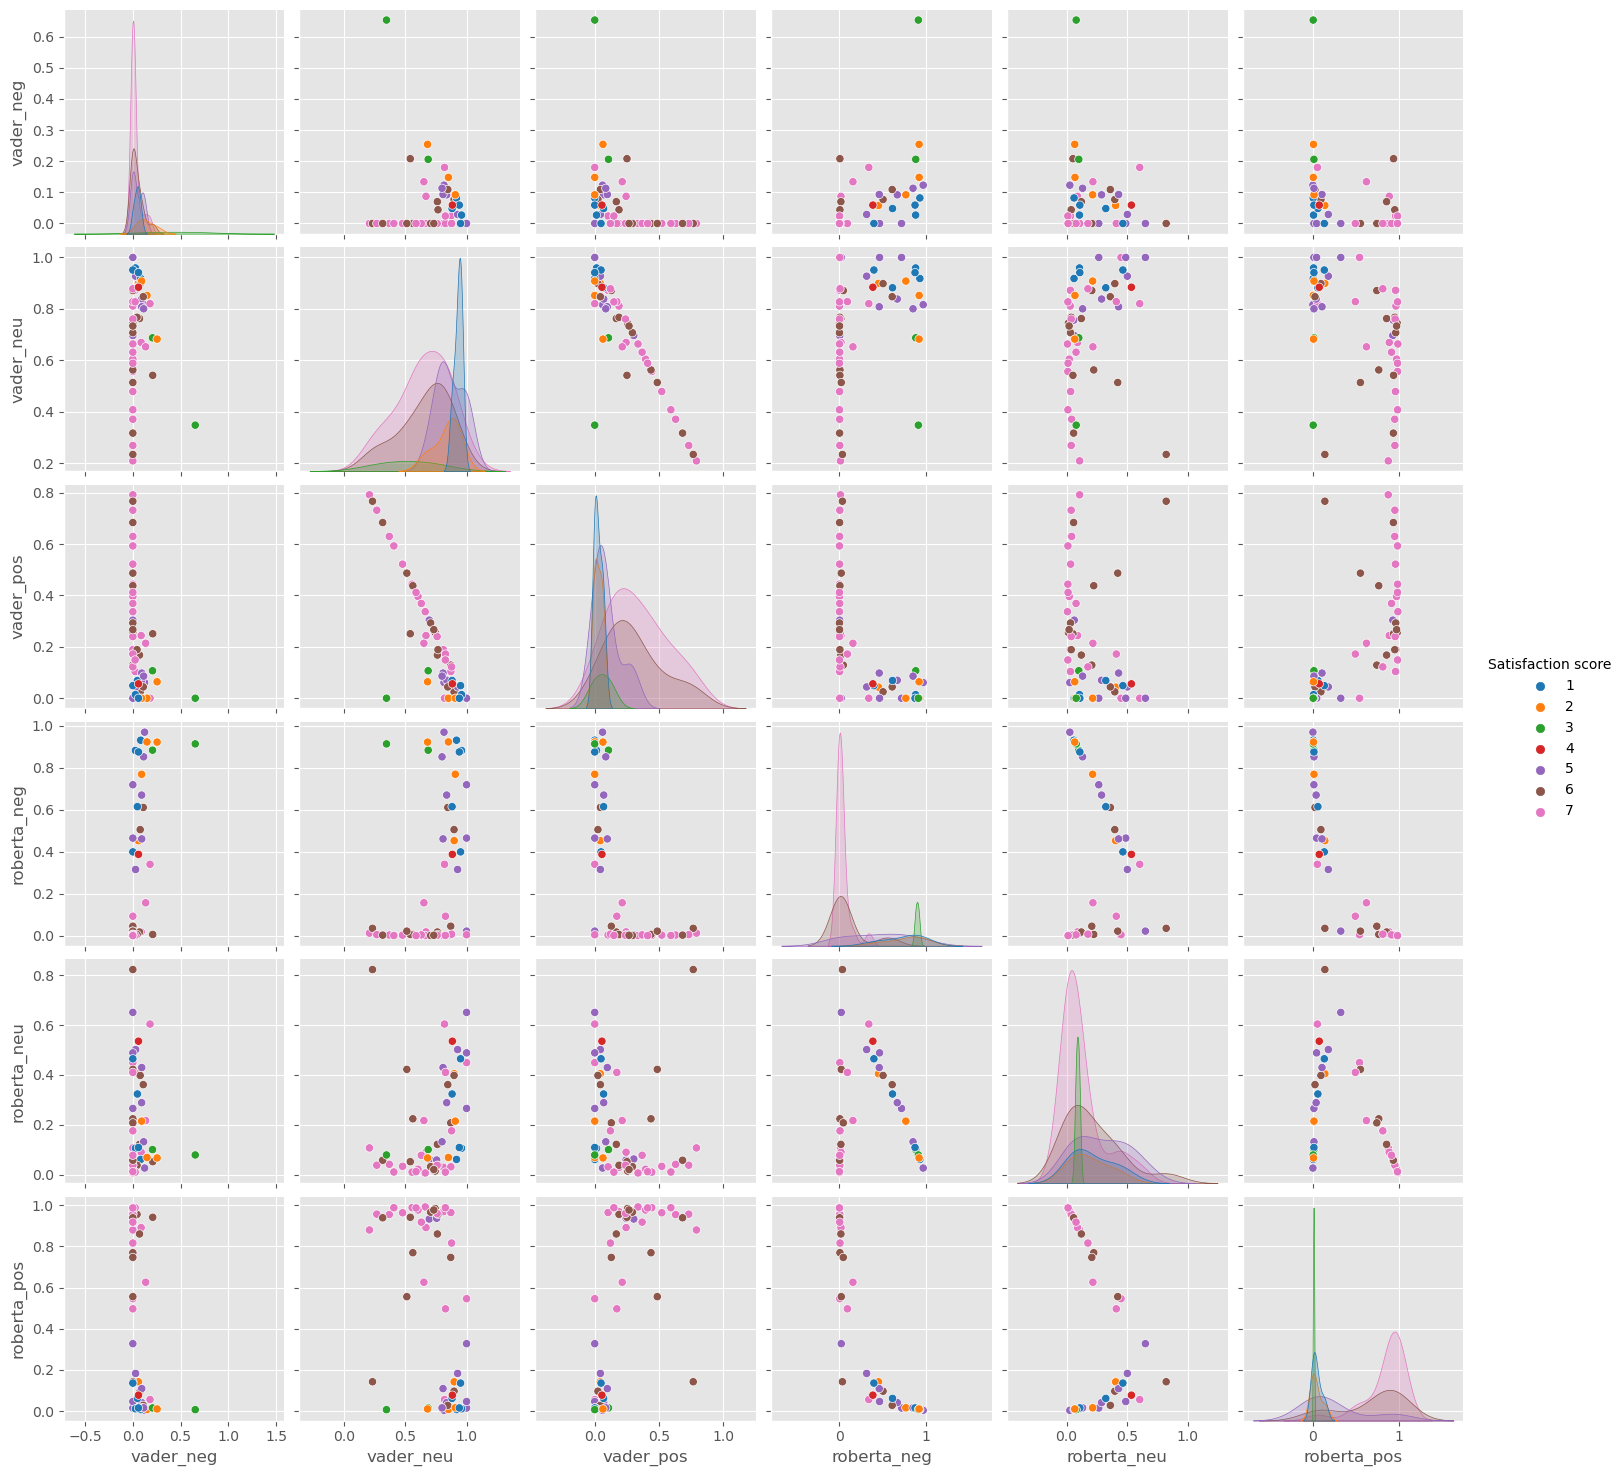

In [33]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Satisfaction score',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [34]:
#Export to Excel

results_df.to_excel('Sentiment_scores.xlsx', index = False)